In [1]:
# OBSERVABLE TRENDS - We couldn't see any trend, as the compound agreegate sentiment of recent media tweets change
# depending on the tweets, irrespective of the media house. So we can't list any trends in this homework. 

# Dependencies
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set()
import pandas as pd
import numpy as np
from datetime import datetime
import math
import json

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Create Target Search Terms list. 
# Bare names (without # or @), will fetch tweets with both # and @

target_terms = ["BBCWorld", "CBSNews","CNN","FoxNews","nytimes"]

# List to hold sentiments
sentiments = []

desired = 100   # desired number of tweets from each media house

# Grab 100 tweets of each media house

for target in target_terms:
        counter = 0
        # Get desired number of tweets (desired = 100 in this case for each target)
        while (counter < desired):   # if desired number of tweets don't get fetched, get more 
            public_tweets = api.search(target, count=(desired-counter), result_type="recent")
            
            for tweet in public_tweets['statuses']:       # Loop through all tweets 
                results = analyzer.polarity_scores(tweet["text"])  # Run Vader Analysis on each tweet
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                
                # convert datetime object to string and then strip out the 10 chars(date)
                Date = str(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y"))
                Date = Date[:19]     # extract date and time
        
                # Add sentiments for each tweet into an array
                sentiments.append({"Source": target,
                            "Text": tweet["text"],
                            "DateTime": Date, 
                            "Compound": compound,
                            "Pos": pos,
                            "Neg": neu,
                            "Neu": neg,
                            "Tweets Ago": counter+1})
                # increment counter 
                counter = counter + 1
    
sentiments_df = pd.DataFrame.from_dict(sentiments)  # Convert sentiments[] to DataFrame

sentiments_df

,Compound,DateTime,Neg,Neu,Pos,Source,Text,Tweets Ago
0,0.1027,2017-12-02 15:27:21,0.909,0.000,0.091,BBCWorld,RT @SimpnMild: *hasnt used paint since 5th gra...,1
1,0.1027,2017-12-02 15:27:16,0.909,0.000,0.091,BBCWorld,RT @SimpnMild: *hasnt used paint since 5th gra...,2
2,-0.1695,2017-12-02 15:27:14,0.923,0.077,0.000,BBCWorld,RT @ThankYouFromCat: SPAIN'S democracy: peacef...,3
3,0.1027,2017-12-02 15:27:13,0.909,0.000,0.091,BBCWorld,RT @SimpnMild: *hasnt used paint since 5th gra...,4
4,0.1027,2017-12-02 15:27:12,0.909,0.000,0.091,BBCWorld,RT @SimpnMild: *hasnt used paint since 5th gra...,5
5,0.1027,2017-12-02 15:27:10,0.909,0.000,0.091,BBCWorld,RT @SimpnMild: *hasnt used paint since 5th gra...,6
6,0.1027,2017-12-02 15:26:59,0.909,0.000,0.091,BBCWorld,RT @SimpnMild: *hasnt used paint since 5th gra...,7
7,-0.5574,2017-12-02 15:26:58,0.806,0.194,0.000,BBCWorld,Shit. \nI only know how to printscreen using P...,8
8,0.1027,2017-12-02 15:26:56,0.909,0.000,0.091,BBCWorld,RT @SimpnMild: *hasnt used paint since 5th gra...,9
9,0.1027,2017-12-02 15:26:56,0.909,0.000,0.091,BBCWorld,RT @SimpnMild: *hasnt used paint since 5th gra...,10


In [3]:
# Sort sentiments_df by timestamp
sentiments_df = sentiments_df.sort_values(by = ['DateTime'], ascending=0) # using 'by =' applies to whole df not just that column

# Api.search gets asked number of recent tweets, but not necessarily in the order of timestamp.
# So index and timestamp had to be resetted to match the order by timestamp. Robin Choi blessed this approach.

sentiments_df = sentiments_df.reset_index(drop=True)
sentiments_df['Tweets Ago'] = range(1, len(sentiments_df) + 1)

sentiments_df.to_csv('Sentiments Analysis of Media Tweets.csv', sep=',')

sentiments_df

,Compound,DateTime,Neg,Neu,Pos,Source,Text,Tweets Ago
0,-0.6808,2017-12-02 15:27:24,0.732,0.268,0.000,FoxNews,"RT @Stump4TrumpPAC: President Trump: ""What has...",1
1,0.0000,2017-12-02 15:27:24,1.000,0.000,0.000,FoxNews,RT @IngrahamAngle: Franken unlikely to survive...,2
2,-0.3818,2017-12-02 15:27:23,0.795,0.205,0.000,CNN,RT @DollarVigilante: Once Again People are Fal...,3
3,-0.3818,2017-12-02 15:27:23,0.795,0.205,0.000,FoxNews,RT @DollarVigilante: Once Again People are Fal...,4
4,0.5106,2017-12-02 15:27:23,0.732,0.000,0.268,nytimes,RT @brooklynmarie: Strong words from the NYT e...,5
5,0.4215,2017-12-02 15:27:23,0.865,0.000,0.135,nytimes,RT @AynRandPaulRyan: Here's how each Senator v...,6
6,-0.2263,2017-12-02 15:27:23,0.853,0.147,0.000,nytimes,RT @nytimes: Honduras Declares Curfew as Prote...,7
7,-0.7351,2017-12-02 15:27:23,0.754,0.246,0.000,CNN,"RT @hotfunkytown: On Friday, Michael Flynn ple...",8
8,0.0000,2017-12-02 15:27:23,1.000,0.000,0.000,nytimes,@nytimes The “benefits” are simply property be...,9
9,-0.5106,2017-12-02 15:27:23,0.732,0.268,0.000,FoxNews,@realDavidFeiner @motivateme2011 @FoxNews Dona...,10


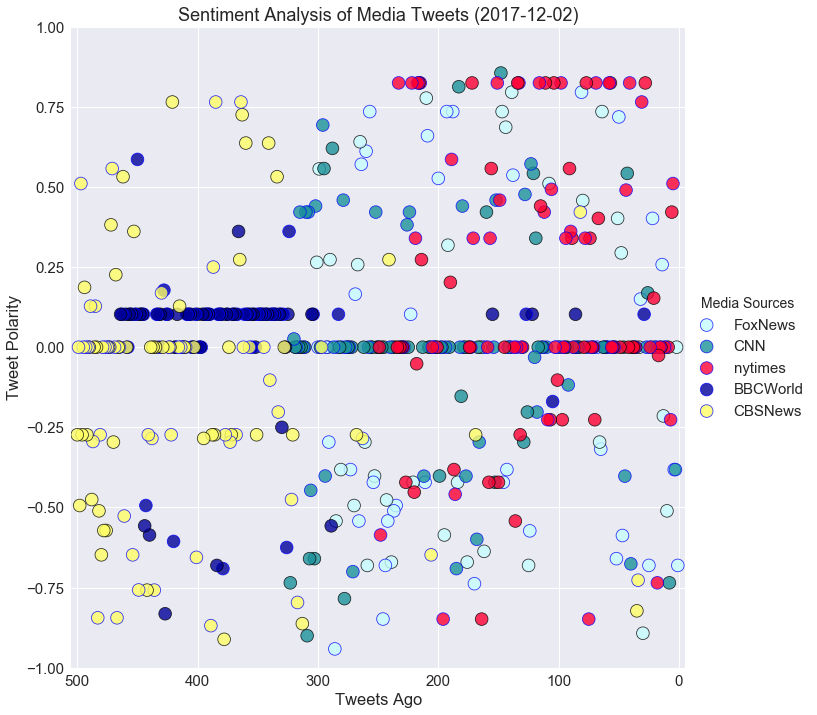

In [4]:
markersize = 160 
kws = dict(s=markersize, linewidth=.8, edgecolor="bk")
sns.set(font_scale = 1.5)

max_tweets = sentiments_df["Tweets Ago"].max()

pyber_palette = ['#c6fcff','#1b919a','#ff0033','#000099','#ffff66']  
# light Sky blue, Green, Red, blue, Yellow

# rename column header to match solution example
sentiments_df.rename(columns = {'Source':'Media Sources'}, inplace = True)  

Date = Date[:10] # extract only date from string

sns.lmplot(x='Tweets Ago', y='Compound', data=sentiments_df,
            fit_reg=False, # No regression line should be displayed
            palette=pyber_palette, 
            scatter_kws=kws,
            hue= 'Media Sources',
            size = 10,
            legend_out=True)
#plt.text(8, 45, "Note:\nCircle size correlates with driver count per city", horizontalalignment='left',size='medium', color='green', weight='light')
plt.title("Sentiment Analysis of Media Tweets ({})".format(Date))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim(max_tweets+5, -5.0)    # margins so plot doesn't end at max values
plt.ylim(-1, 1)

# Save the figure
plt.savefig("Sentiment Analysis of Media Tweets.png")

plt.show()

BBC = 0.027298, CBS = -0.119644, CNN = -0.007832, FOX = -0.053704, NYT = 0.165882


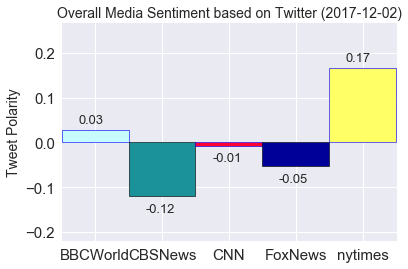

In [6]:
BBC = sentiments_df.groupby('Media Sources')['Compound'].mean()['BBCWorld']
CBS = sentiments_df.groupby('Media Sources')['Compound'].mean()['CBSNews']
CNN = sentiments_df.groupby('Media Sources')['Compound'].mean()['CNN']
FOX = sentiments_df.groupby('Media Sources')['Compound'].mean()['FoxNews']
NYT = sentiments_df.groupby('Media Sources')['Compound'].mean()['nytimes']
print("BBC = " + str(BBC) + ", CBS = " + str(CBS) + ", CNN = " + str(CNN) +", FOX = " + str(FOX) +", NYT = " + str(NYT))

x_labels = ['BBCWorld','CBSNews','CNN','FoxNews','nytimes']
y_sentiments = [BBC,CBS,CNN,FOX,NYT]
palette = ['#c6fcff','#1b919a','#ff0033','#000099','#ffff66']  
# light Sky blue, Green, Red, blue, Yellow

x_pos = [0,1,2,3,4]    # positions for media sources on x axis
plt.bar(x_pos, y_sentiments, color=sns.color_palette(palette,5), align='center', width = 1, edgecolor = 'bk', linewidth = .6)
plt.xlim(-0.5, len(x_labels)-0.49)   # 0.49 instead of 0.5 to show black edgeline of last bar
plt.ylim(min(y_sentiments)-0.1, max(y_sentiments)+0.1)  # margins of +/-0.1 beyond max/min values
plt.xticks(x_pos, x_labels)
plt.title("Overall Media Sentiment based on Twitter ({})".format(Date), fontsize=14)
plt.ylabel("Tweet Polarity", fontsize=14)
for a,b in zip(x_pos, y_sentiments):  # show values of each bar in the plot
    if b <= 0:
        B = b-0.035                   # position text below bar for negative bars.  
    else:                             # Value of 'b' is preserved as its ploted (bar height)
        B = b+0.015                   # position text above bar for positive bars
    plt.text(a-0.25, B, str(round(b, 2)), fontsize = 13)  # round to 2 decimal places before plotting

# Save the figure
plt.savefig("Overall Media Sentiment based on Twitter.png")

plt.show()
